<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://plus.unsplash.com/premium_photo-1661963439471-0d0eeb1330d4?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2FsaWZvcm5pYSUyMGhvdXNlfGVufDB8fDB8fHww" width = "400" align="center"/>


Los datos utilizados corresponden a propiedades localizadas en un distrito específico de California, junto con algunas estadísticas resumen extraídas del censo de 1990. Es importante tener en cuenta que los datos no han sido procesados previamente, por lo que será necesario realizar algunas etapas de limpieza y preprocesamiento.

Las columnas incluidas en el conjunto de datos son las siguientes (sus nombres son descriptivos):

* **longitude**: Longitud geográfica de la propiedad.
* **latitude**: Latitud geográfica de la propiedad.
* **housingmedianage**: Edad media de las viviendas en la zona.
* **total_rooms**: Número total de habitaciones.
* **total_bedrooms**: Número total de dormitorios.
* **population**: Población en el área circundante.
* **households**: Número de hogares en la zona.
* **median_income**: Ingreso medio por hogar.
* **medianhousevalue**: Valor medio de la propiedad.
* **ocean_proximity**: Proximidad al océano.

El objetivo de este análisis es predecir el valor medio de las propiedades utilizando las características proporcionadas.

Para completar este laboratorio, se recomienda seguir la siguiente rúbrica de trabajo:

1. **Definición del problema**: Clarificar el objetivo del análisis y los resultados esperados.
2. **Estadística descriptiva**: Resumir las principales características de los datos a través de medidas estadísticas.
3. **Visualización descriptiva**: Utilizar gráficos para explorar los datos y sus relaciones.
4. **Preprocesamiento**: Realizar los pasos necesarios de limpieza y transformación de los datos.
5. **Selección de modelo**: Comparar al menos cuatro modelos de predicción diferentes.
6. **Métricas y análisis de resultados**: Evaluar el rendimiento de los modelos utilizando métricas apropiadas.
7. **Visualización de resultados del modelo**: Crear gráficos que muestren el desempeño de los modelos.
8. **Conclusiones**: Resumir los hallazgos del análisis.

> **Nota**: Se anima a los estudiantes a desarrollar un análisis más profundo si lo desean. Pueden consultar como referencia el siguiente [enlace](https://www.kaggle.com/camnugent/california-housing-prices).

In [42]:
#Librerías.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [5]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


__Definición del Problema:__ En el problema analizaremos las diversas columnas del dataFrame utilizando la media. La idea es poder predecir el estadístico de la media de los diferentes datos asociados a las propiedades.

__Estadística Descriptiva:__

In [6]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
housing.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

Vemos que todos los datos datos son de tipo entero y que la longitud y la latitud tienen una desviación estandar particularmente baja. Mientras que Population tiene una desviación estandar particularmente alta.

__Visualización Descriptiva:__

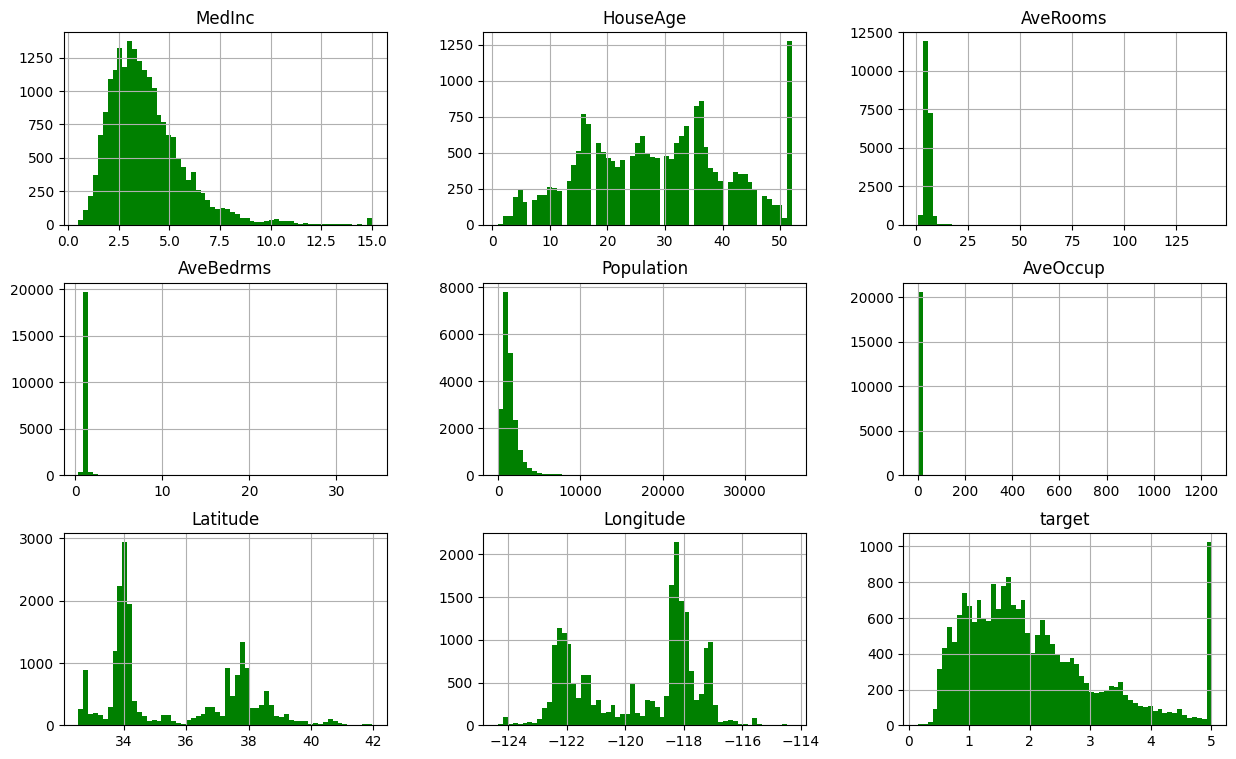

In [23]:
housing.hist(bins=60, figsize=(15,9), color='green')
plt.show()

- En Latitude y Longitud hay dos picos de cantidad de datos.
- AvaRooms, AveBedrms, Population y AveOccup, parecen tener los datos muy concentrados en sólo intervalo, sin envargo la varianza de Population es demasiado alta.
- HouseAge presenta unos saltos de edad y tiene un Peak cerca de los 50 años.

__Procesamiento:__

In [22]:
clean_data = housing
n_data = clean_data.shape[0]
for col in clean_data.columns:
    if col != "target":
        mean = clean_data[col].mean()
        std = clean_data[col].std()
        clean_data = clean_data[np.absolute(clean_data[col]-mean)<2*std].reset_index().drop(columns ="index")
print(f"Porcentaje de datos eliminados: {(1-clean_data.shape[0]/n_data)*100}%")

Porcentaje de datos eliminados: 15.809108527131787%


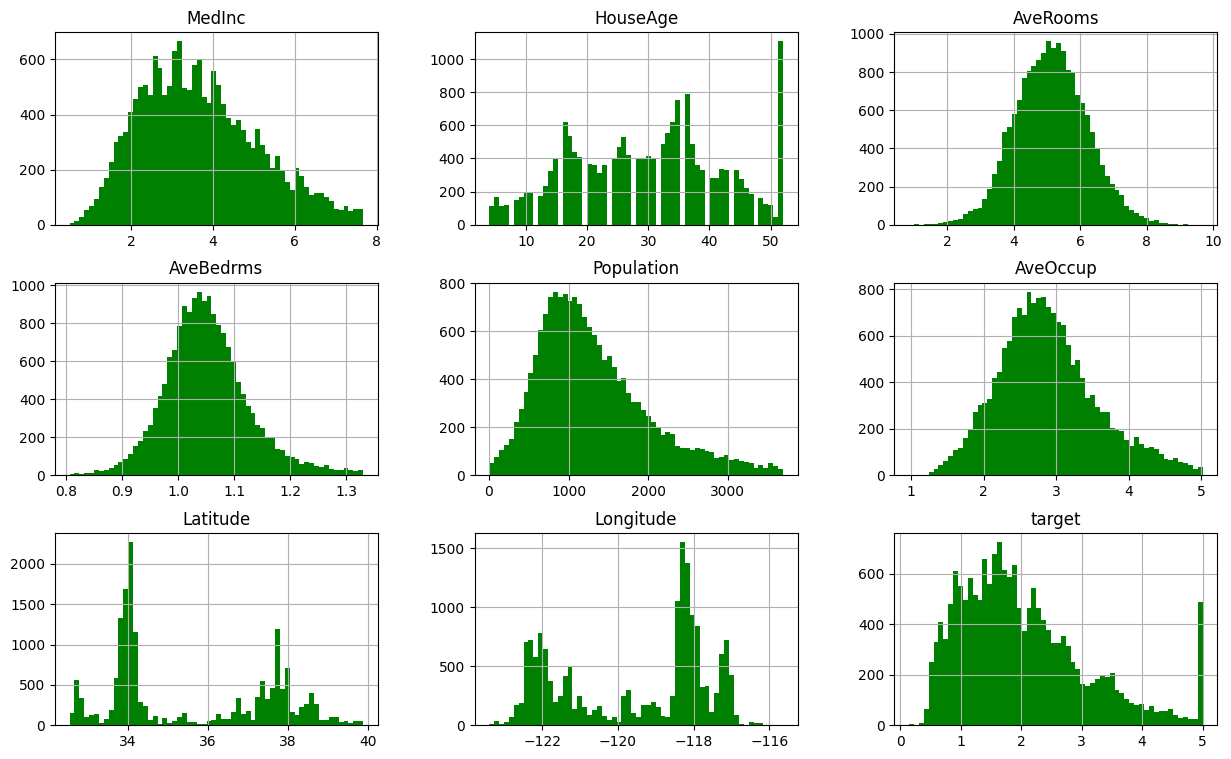

In [25]:
clean_data.hist(bins=60, figsize=(15,9), color='green')
plt.show()

Vemos que ahora las curvas se asemejan más a distribuciones gausianas o a mixturas gaussianas.

__Selección de Modelo y visualización:__

In [34]:
# Datos ficticios (X son las características, y es la variable a predecir)
X = clean_data.drop(columns="target")
y = clean_data["target"] # Relación lineal con ruido

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo y ajustarlo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = linear_model.predict(X_test)

In [49]:
LR = LinearRegression()
LR.fit(X_train, y_train)

df_LR = pd.DataFrame({'y': y_test, 'yhat': LR.predict(X_test)})
df_LR_results = regression_metrics(df_LR)
df_LR_results

,mae,mse,rmse,mape,smape
0,0.468,0.4024,0.6343,28.9003,0.4484


In [50]:
# Crear el modelo SVR
svr_model = SVR(kernel='rbf')  # RBF es un kernel común para relaciones no lineales
svr_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = svr_model.predict(X_test)

# Evaluar el modelo
df_SVR= pd.DataFrame({'y': y_test, 'yhat': y_pred})
df_SVR_results = regression_metrics(df_SVR)
df_SVR_results

,mae,mse,rmse,mape,smape
0,0.7825,1.0593,1.0292,49.9046,0.6658


In [51]:
# Crear el modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = tree_model.predict(X_test)

# Evaluar el modelo
df_tree_model= pd.DataFrame({'y': y_test, 'yhat': y_pred})
df_tree_model_results = regression_metrics(df_tree_model)
df_tree_model_results

,mae,mse,rmse,mape,smape
0,0.4365,0.4658,0.6825,23.4566,0.38


In [52]:
# Crear el modelo Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 árboles
forest_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = forest_model.predict(X_test)

# Evaluar el modelo
df_RF= pd.DataFrame({'y': y_test, 'yhat': y_pred})
df_RF_results = regression_metrics(df_RF)
df_RF_results

,mae,mse,rmse,mape,smape
0,0.3168,0.238,0.4879,17.7928,0.3021


__Métricas y análisis de resultados:__ Vemos que Random Forest tiene errores más bajos. Es decir, nos da la mejor aproximación.

__Conclusiones:__ Luego de limpiar los datos, vemos que el Random Forest es el modelo más apropiado para aproximar.